In [1]:
!pip install watermark
!pip install vaderSentiment
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "

In [3]:
import re
import unicodedata
import itertools
from datasets import Dataset


In [4]:

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

In [5]:
# Data visualization
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt


In [6]:
# ML NLP
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
# Stopwords list in multiple languages
nltk.download('stopwords')

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())


Python version in this Jupyter Notebook: 3.11.12


In [10]:
# Load library versions
import watermark

In [11]:
# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversion

Author: Library versions

watermark : 2.5.0
seaborn   : 0.13.2
pandas    : 2.2.2
matplotlib: 3.10.0
plotly    : 5.24.1
numpy     : 2.0.2
platform  : 1.0.8
re        : 2.2.1
nltk      : 3.9.1
datasets  : 3.5.0



In [12]:
import zipfile
import os

# Path to the zip file
zip_path = '/content/News Category Dataset.zip'

# Directory where you want to extract
extract_path = '/content/News Category Dataset'

# Unzipping the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset unzipped successfully!")


Dataset unzipped successfully!


In [13]:
df = pd.read_json("/content/News Category Dataset/News_Category_Dataset_v3.json", lines=True)
df = df[['headline', 'category']].dropna()

In [26]:
# Viewing 5 latest data
df.tail()

,headline,category
209522,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH
209523,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS
209524,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS
209525,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS
209526,Dwight Howard Rips Teammates After Magic Loss ...,SPORTS


In [14]:
# Info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   headline  209527 non-null  object
 1   category  209527 non-null  object
dtypes: object(2)
memory usage: 3.2+ MB


In [15]:
# Type data
df.dtypes

,0
headline,object
category,object


In [16]:
df.shape

(209527, 2)

In [17]:
data = df.copy()

In [18]:
print("Checking for missing values in each column:")
print(df.isnull().sum())

Checking for missing values in each column:
headline    0
category    0
dtype: int64


In [19]:
df = df.dropna(axis=1)

# Check remaining columns after removal
print("Remaining columns after removing columns with NaN:")
print(df.isnull().sum())

Remaining columns after removing columns with NaN:
headline    0
category    0
dtype: int64


In [20]:
# Import the necessary class
from sklearn.preprocessing import LabelEncoder

# Now you can use LabelEncoder
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['category'])

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['headline'], df['label'], test_size=0.2, stratify=df['label'], random_state=42)

In [22]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
stemmer = PorterStemmer()

In [26]:
stop_words = set(stopwords.words('english'))

In [27]:
# Function to clean the text by removing URLs, handles, and punctuation
def clean_text(text):
    if isinstance(text, str):
        # Convert text to lowercase
        text = text.lower()

        # Remove URLs (http, https, and www links)
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

        # Remove markdown-style links [text](link)
        text = re.sub(r'\[.*?\]\(.*?\)', '', text)

        # Remove handles (@username mentions)
        text = re.sub(r'@\w+', '', text)

        # Remove punctuation and special characters
        text = text.translate(str.maketrans('', '', string.punctuation))

        return text
    else:
        return text

In [28]:
def tokenize_text(text):
    if isinstance(text, str):
        return word_tokenize(text)
    else:
        return text

In [29]:
def remove_stopwords(tokens):
    if isinstance(tokens, list):
        return [word for word in tokens if word not in stop_words]
    else:
        return tokens

In [30]:
# Function to apply stemming to the tokens
def stem_tokens(tokens):
    if isinstance(tokens, list):
        return [stemmer.stem(token) for token in tokens]
    else:
        return tokens


In [31]:
df['Cleaned_Headline'] = df['headline'].apply(clean_text)


In [32]:
# Tokenize the cleaned text
!pip install nltk
import nltk
nltk.download('punkt')

# Before calling word_tokenize, download 'punkt_tab'
nltk.download('punkt_tab')

# Apply the tokenization to the 'Cleaned_Headline' column
df['Tokenized_Review'] = df['Cleaned_Headline'].apply(tokenize_text) # Changed 'Cleaned_Review' to 'Cleaned_Headline'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [33]:

# Apply stemming to the tokenized words
df['Stemmed_Review'] = df['Tokenized_Review'].apply(stem_tokens)

# Remove stopwords from the tokenized text
df['No_Stopwords_Review'] = df['Tokenized_Review'].apply(remove_stopwords)

# Display the first few rows of the DataFrame to visualize the dataset
df.head()



,headline,category,label,Cleaned_Headline,Tokenized_Review,Stemmed_Review,No_Stopwords_Review
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,35,over 4 million americans roll up sleeves for o...,"[over, 4, million, americans, roll, up, sleeve...","[over, 4, million, american, roll, up, sleev, ...","[4, million, americans, roll, sleeves, omicron..."
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,35,american airlines flyer charged banned for lif...,"[american, airlines, flyer, charged, banned, f...","[american, airlin, flyer, charg, ban, for, lif...","[american, airlines, flyer, charged, banned, l..."
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,5,23 of the funniest tweets about cats and dogs ...,"[23, of, the, funniest, tweets, about, cats, a...","[23, of, the, funniest, tweet, about, cat, and...","[23, funniest, tweets, cats, dogs, week, sept,..."
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,22,the funniest tweets from parents this week sep...,"[the, funniest, tweets, from, parents, this, w...","[the, funniest, tweet, from, parent, thi, week...","[funniest, tweets, parents, week, sept, 1723]"
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,35,woman who called cops on black birdwatcher los...,"[woman, who, called, cops, on, black, birdwatc...","[woman, who, call, cop, on, black, birdwatch, ...","[woman, called, cops, black, birdwatcher, lose..."


In [34]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer, which is part of the VADER sentiment analysis tool.
analyzer = SentimentIntensityAnalyzer()


In [35]:

# Function to apply VADER sentiment analysis to each review.
# The function takes in a 'review' (text) and returns the polarity scores, which include
# 'compound', 'positive', 'negative', and 'neutral' sentiment values.
def get_sentiment(review):
    return analyzer.polarity_scores(review)


In [36]:
# Apply the 'get_sentiment' function to each entry in the 'Cleaned_Headline' column.
# Store the resulting sentiment scores (dictionary) in a new column 'vader_scores'.
df['vader_scores'] = df['Cleaned_Headline'].apply(get_sentiment) # Changed 'Cleaned_Review' to 'Cleaned_Headline'

In [37]:

# Extract the 'compound' score from the 'vader_scores' dictionary for each review.
# The 'compound' score is a normalized score ranging from -1 (most negative) to +1 (most positive),
# summarizing the overall sentiment of the text.
df['compound'] = df['vader_scores'].apply(lambda score_dict: score_dict['compound'])


In [38]:

# Function to classify the sentiment based on the 'compound' score.
# Scores >= 0.05 are classified as 'Positive', <= -0.05 as 'Negative', and anything in between as 'Neutral'.
def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [39]:
# Apply the 'classify_sentiment' function to the 'compound' score to get the overall sentiment
# classification (Positive, Negative, or Neutral) for each review.
df['sentiment'] = df['compound'].apply(classify_sentiment)

# Display the first few rows of the DataFrame, showing the cleaned headline text,
# the 'compound' sentiment score, and the classified 'sentiment'.
print(df[['Cleaned_Headline', 'compound', 'sentiment']].head(10)) # Changed 'Cleaned_Review' to 'Cleaned_Headline'

                                    Cleaned_Headline  compound sentiment
0  over 4 million americans roll up sleeves for o...    0.0000   Neutral
1  american airlines flyer charged banned for lif...   -0.5859  Negative
2  23 of the funniest tweets about cats and dogs ...    0.5574  Positive
3  the funniest tweets from parents this week sep...    0.5574  Positive
4  woman who called cops on black birdwatcher los...   -0.4939  Negative
5  cleaner was dead in belk bathroom for 4 days b...   -0.5574  Negative
6  reporter gets adorable surprise from her boyfr...    0.6486  Positive
7  puerto ricans desperate for water after hurric...   -0.3182  Negative
8  how a new documentary captures the complexity ...    0.0000   Neutral
9  biden at un to call russian war an affront to ...   -0.5994  Negative


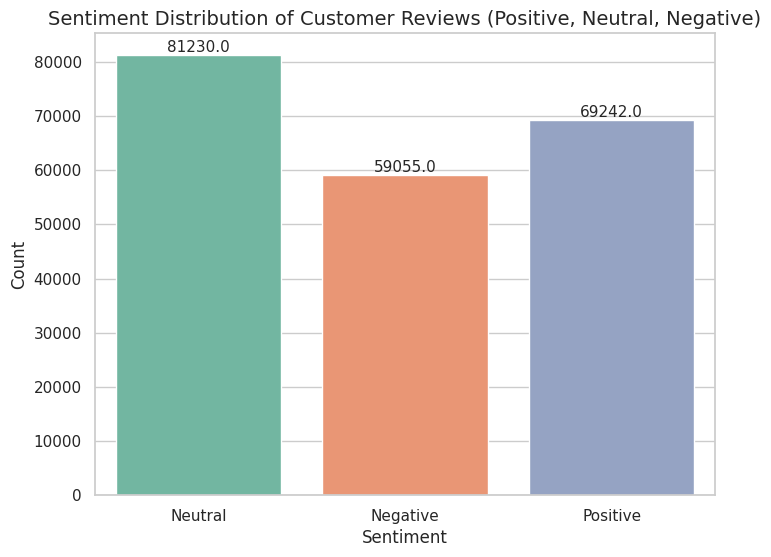

In [40]:
# Assuming df is already loaded and contains the 'sentiment' column
plt.figure(figsize=(8, 6))

# Count plot with a specific color palette
sns.countplot(data=df, x='sentiment', palette='Set2')

# Add title and axis labels with adjusted font sizes
plt.title('Sentiment Distribution of Customer Reviews (Positive, Neutral, Negative)', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding data labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', fontsize=11)

# Display the plot
plt.show()

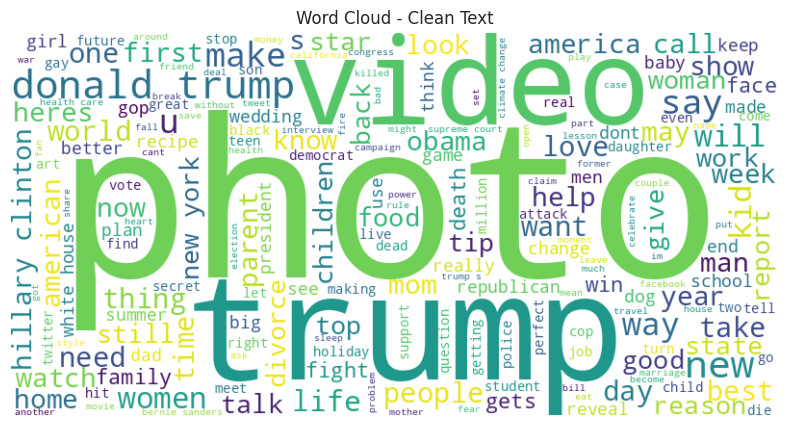

In [41]:
from wordcloud import WordCloud

# Replace 'Cleaned_Review' with 'Cleaned_Headline'
wordcloud = WordCloud(width=800, height=400,
                      background_color='white').generate(' '.join(df['Cleaned_Headline'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Clean Text")
plt.show()

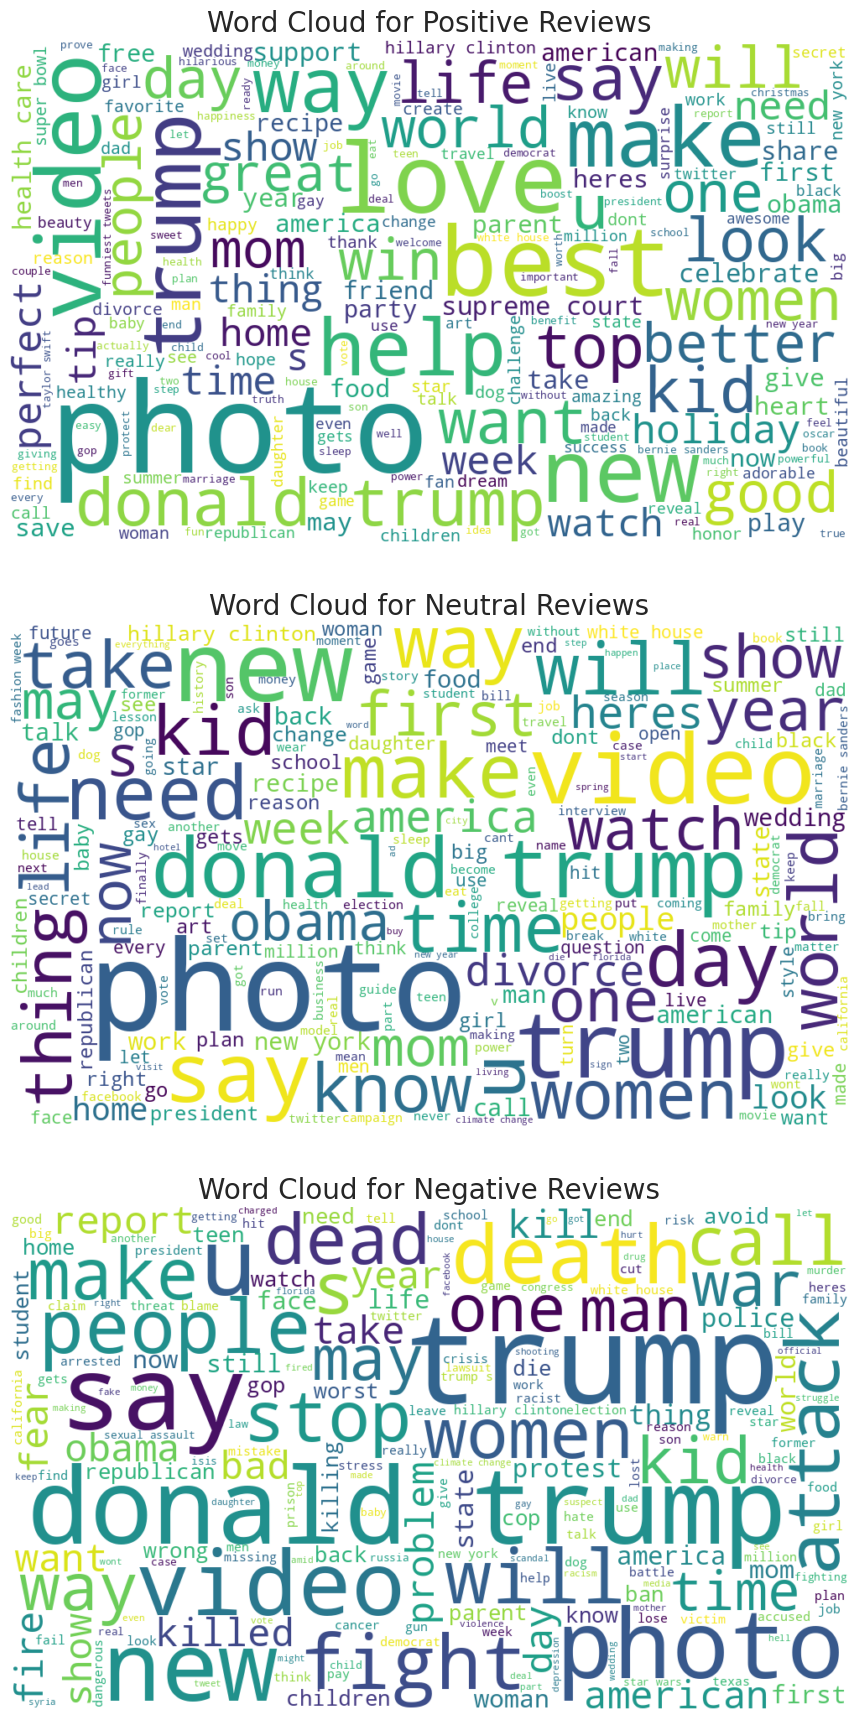

In [42]:
# Separate reviews based on sentiment
positive_reviews = " ".join(df[df['sentiment'] == 'Positive']['Cleaned_Headline'].tolist()) # Changed 'Cleaned_Review' to 'Cleaned_Headline'
neutral_reviews = " ".join(df[df['sentiment'] == 'Neutral']['Cleaned_Headline'].tolist()) # Changed 'Cleaned_Review' to 'Cleaned_Headline'
negative_reviews = " ".join(df[df['sentiment'] == 'Negative']['Cleaned_Headline'].tolist()) # Changed 'Cleaned_Review' to 'Cleaned_Headline'

# Generate word clouds with larger dimensions and font size
wordcloud_positive = WordCloud(width=1000, height=600, background_color='white', max_font_size=150).generate(positive_reviews)
wordcloud_neutral = WordCloud(width=1000, height=600, background_color='white', max_font_size=150).generate(neutral_reviews)
wordcloud_negative = WordCloud(width=1000, height=600, background_color='white', max_font_size=150).generate(negative_reviews)

# Plot the word clouds for each sentiment with larger figure size
plt.figure(figsize=(10, 18))

# Positive word cloud
plt.subplot(3, 1, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews', fontsize=20)
plt.axis('off')

# Neutral word cloud
plt.subplot(3, 1, 2)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Word Cloud for Neutral Reviews', fontsize=20)
plt.axis('off')

# Negative word cloud
plt.subplot(3, 1, 3)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews', fontsize=20)
plt.axis('off')

# Show the word clouds
plt.tight_layout(pad=3)
plt.show()

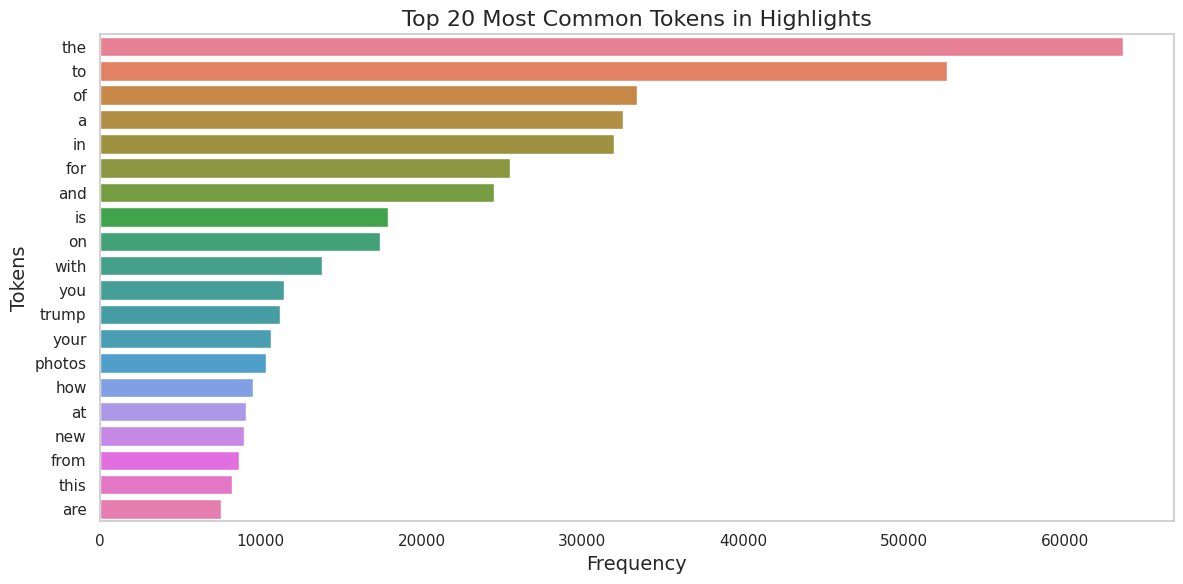

In [43]:
from collections import Counter
import pandas as pd

# Reload the DataFrame to include 'Tokenized_Review' column
df = pd.read_json("/content/News Category Dataset/News_Category_Dataset_v3.json", lines=True)
df = df[['headline', 'category']].dropna()
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['category'])
df['Cleaned_Headline'] = df['headline'].apply(clean_text)
df['Tokenized_Review'] = df['Cleaned_Headline'].apply(tokenize_text)  # Recreating the column


# Now proceed with the rest of your code
all_tokens = [token for tokens in df['Tokenized_Review'] for token in tokens]

# ... (rest of your code for token frequency analysis)
# Count the frequency of tokens
token_counts = Counter(all_tokens)

# Get the top 20 most common tokens
common_tokens = token_counts.most_common(20)  # Limiting to top 20

# Separate tokens and their frequencies
tokens, frequencies = zip(*common_tokens)

# Create a bar plot for the most frequent tokens
plt.figure(figsize=(12, 6))
sns.barplot(x=list(frequencies), y=list(tokens), palette='husl')  # Changed palette

# Improved title and axis labels
plt.title('Top 20 Most Common Tokens in Highlights', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Tokens', fontsize=14)

# Add gridlines for easier reading of bar heights
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()  # Ensure layout is clean and labels fit well
plt.grid(False)
plt.show()

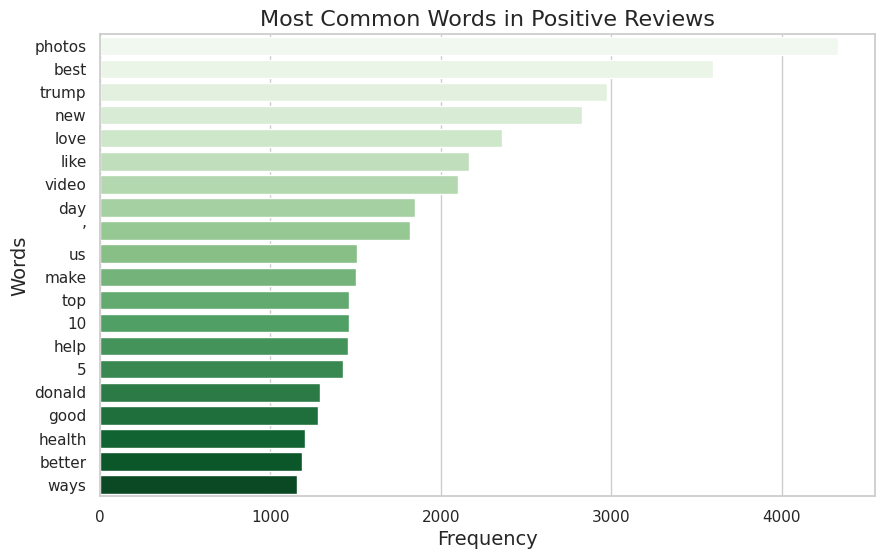

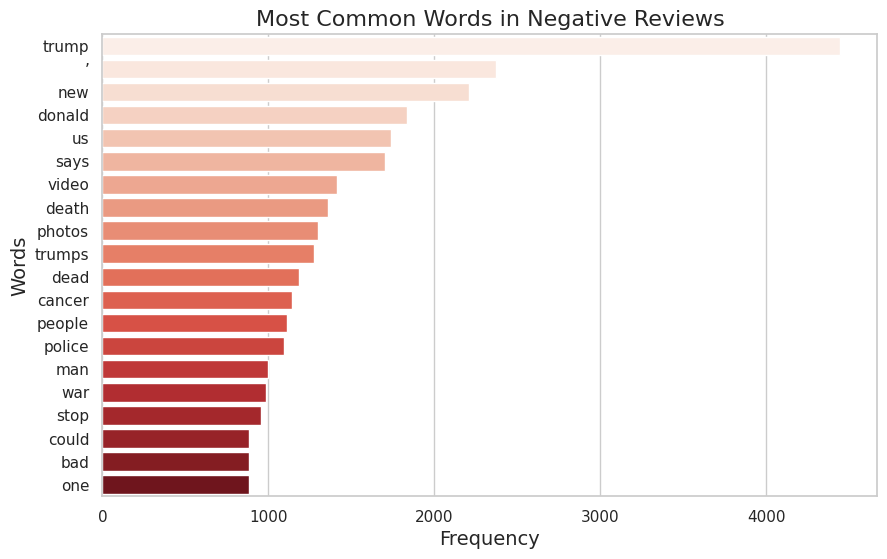

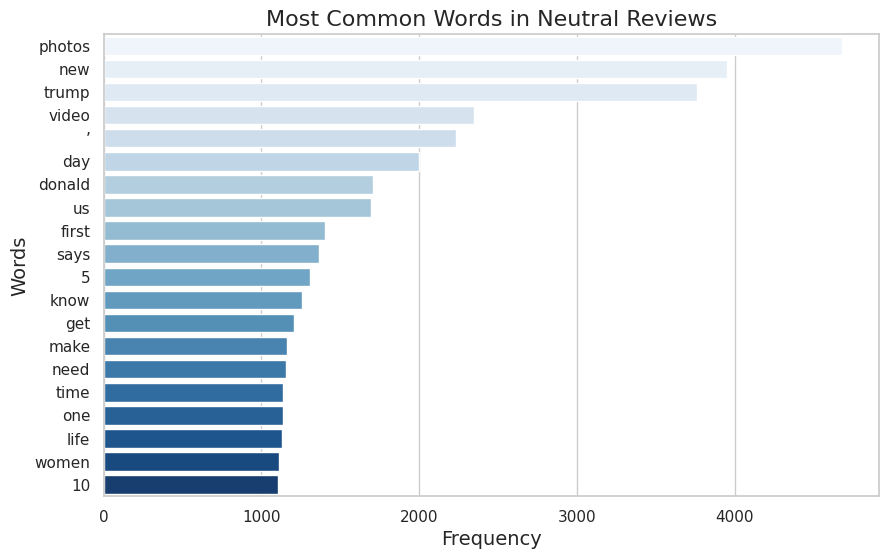

In [45]:
from collections import Counter

# Function to plot the most common words for each sentiment
def plot_most_common_words(common_words, sentiment, color):
    # Unzip the common_words tuple into two lists: words and their respective counts
    words, counts = zip(*common_words)

    # Create a bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), palette=color)

    # Set the title and axis labels
    plt.title(f'Most Common Words in {sentiment} Reviews', fontsize=16)
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('Words', fontsize=14)

    # Display the chart
    plt.show()

# Generate the most common words for each sentiment

# Reload the DataFrame to include sentiment data
df = pd.read_json("/content/News Category Dataset/News_Category_Dataset_v3.json", lines=True)
df = df[['headline', 'category']].dropna()
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['category'])
df['Cleaned_Headline'] = df['headline'].apply(clean_text)
df['Tokenized_Review'] = df['Cleaned_Headline'].apply(tokenize_text)  # Recreating the column
df['Stemmed_Review'] = df['Tokenized_Review'].apply(stem_tokens)
df['No_Stopwords_Review'] = df['Tokenized_Review'].apply(remove_stopwords)
# Apply VADER sentiment analysis to get the sentiment column
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
def get_sentiment(review):
    return analyzer.polarity_scores(review)
df['vader_scores'] = df['Cleaned_Headline'].apply(get_sentiment)
df['compound'] = df['vader_scores'].apply(lambda score_dict: score_dict['compound'])
def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
df['sentiment'] = df['compound'].apply(classify_sentiment)

# Now proceed with the rest of your code:
# Filter reviews based on sentiment
positive_reviews = df[df['sentiment'] == 'Positive']['No_Stopwords_Review']
negative_reviews = df[df['sentiment'] == 'Negative']['No_Stopwords_Review']
neutral_reviews = df[df['sentiment'] == 'Neutral']['No_Stopwords_Review']

# Combine all words into a single list for each sentiment
positive_words_list = [word for review in positive_reviews for word in review]
negative_words_list = [word for review in negative_reviews for word in review]
neutral_words_list = [word for review in neutral_reviews for word in review]

# Count the most common words in each sentiment's word list
positive_words = Counter(positive_words_list).most_common(20)
negative_words = Counter(negative_words_list).most_common(20)
neutral_words = Counter(neutral_words_list).most_common(20)

# Plot the most common words for Positive sentiment
plot_most_common_words(positive_words, 'Positive', 'Greens')

# Plot the most common words for Negative sentiment
plot_most_common_words(negative_words, 'Negative', 'Reds')

# Plot the most common words for Neutral sentiment
plot_most_common_words(neutral_words, 'Neutral', 'Blues')

In [46]:
# Deleting unwanted columns
df = df.drop(columns=['headline', 'category', 'Cleaned_Headline', 'vader_scores', 'compound', 'sentiment', 'Tokenized_Review', 'Stemmed_Review', 'No_Stopwords_Review'], errors='ignore')
# errors='ignore' will skip columns that are not found

# Displaying the first few rows of the dataframe to verify
df.head()

,label
0,35
1,35
2,5
3,22
4,35


In [48]:
# Reload your DataFrame to get back the original data including the 'headline' column.
df = pd.read_json("/content/News Category Dataset/News_Category_Dataset_v3.json", lines=True)
df = df[['headline', 'category']].dropna()
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['category'])

# Now proceed with the TF-IDF vectorization process.
df['Cleaned_Headline'] = df['headline'].apply(clean_text)

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['Cleaned_Headline'])
y = df['label']

tfidf_vectorizer

TfidfVectorizer(max_features=5000)

In [49]:
# Visualizing data x
X.shape

(209527, 5000)

In [50]:
y.shape

(209527,)

In [51]:
# Import the LabelEncoder class from sklearn, which is used to convert categorical labels to numeric values
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder instance
le = LabelEncoder()

# Apply LabelEncoder to the target variable 'y', which contains categorical sentiment labels
# The fit_transform() method encodes the labels (e.g., 'Positive', 'Neutral', 'Negative') into numeric values (e.g., 0, 1, 2)
y = le.fit_transform(y)

# The 'le' object now contains the mapping between the original labels and the numeric values
le

LabelEncoder()

In [52]:
# Importing library
from sklearn.model_selection import train_test_split

# Training and testing division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Viewing training data
print("Viewing rows and columns given by X train", X_train.shape)

# Viewing test data
print("Viewing rows and columns given y train", y_train.shape)

Viewing rows and columns given by X train (167621, 5000)
Viewing rows and columns given y train (167621,)


In [53]:
# Convert your TF-IDF sparse matrix to a dense matrix
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

# Clean headlines
df['headline'] = df['headline'].astype(str).apply(clean_text)

# Encode labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['category'])

# Split data
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['headline'], df['label'], test_size=0.2, random_state=42, stratify=df['label'])

# Convert text data to TF-IDF vectors (boosted params)
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000, ngram_range=(1, 2))
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

# Selected models to be evaluated
models = [
    LogisticRegression(max_iter=1000, random_state=50),
    KNeighborsClassifier(n_neighbors=5),
    GradientBoostingClassifier(random_state=42)
]

# Evaluate each selected model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print("-----------------")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Model 1: LogisticRegression
Training Accuracy: 0.6283
Testing Accuracy: 0.5624
-----------------
Model 2: KNeighborsClassifier
Training Accuracy: 0.4936
Testing Accuracy: 0.2848
-----------------
Model 3: GradientBoostingClassifier
Training Accuracy: 0.5238
Testing Accuracy: 0.4499
-----------------


Training: Logistic Regression
Logistic Regression does not support feature importances.

Training: KNN
KNN does not support feature importances.

Training: Gradient Boosting


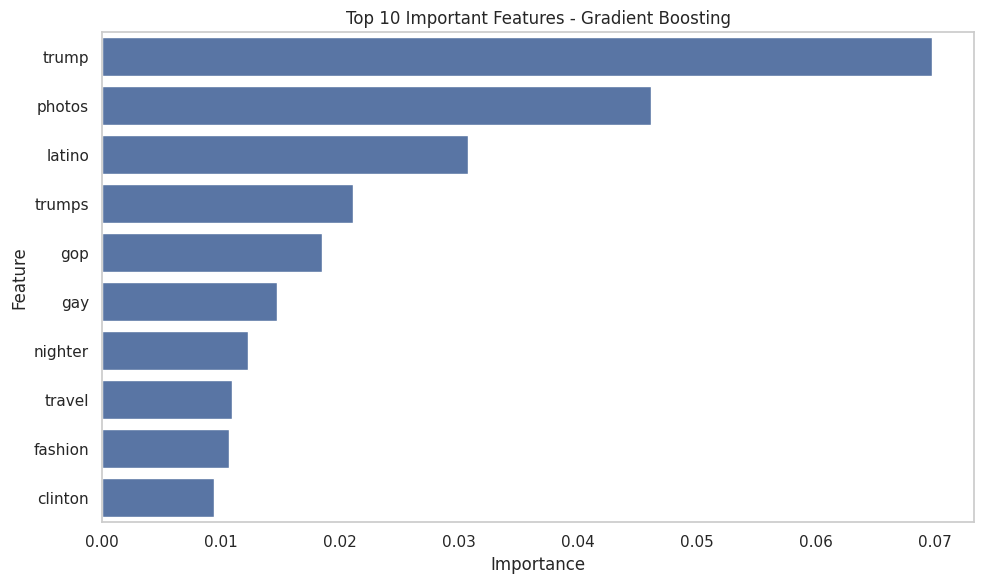

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'df', 'X_train', 'y_train', and 'vectorizer' are already defined
# from previous cells (cell 75 in your case)

# Define selected models
models_with_names = [
    ("Logistic Regression", LogisticRegression(random_state=50)),
    ("KNN", KNeighborsClassifier(n_neighbors=13)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42))
]

# Get TF-IDF feature names from the CORRECT vectorizer
feature_names = vectorizer.get_feature_names_out()  # Use 'vectorizer' from cell 75

# Iterate over selected models
for model_name, model in models_with_names:
    print(f"Training: {model_name}")

    # Use appropriate input
    X_train_input = X_train  # Use 'X_train' from cell 75

    # Fit model
    model.fit(X_train_input, y_train)

    # Check and extract feature importances if available
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_

        # Create DataFrame
        feature_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': feature_importances
        })

        # Top 10 features
        top_features = feature_df.sort_values(by='Importance', ascending=False).head(10)

        # Plot
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=top_features)
        plt.title(f"Top 10 Important Features - {model_name}")
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.grid(False)
        plt.tight_layout()
        plt.show()

    else:
        print(f"{model_name} does not support feature importances.\n")

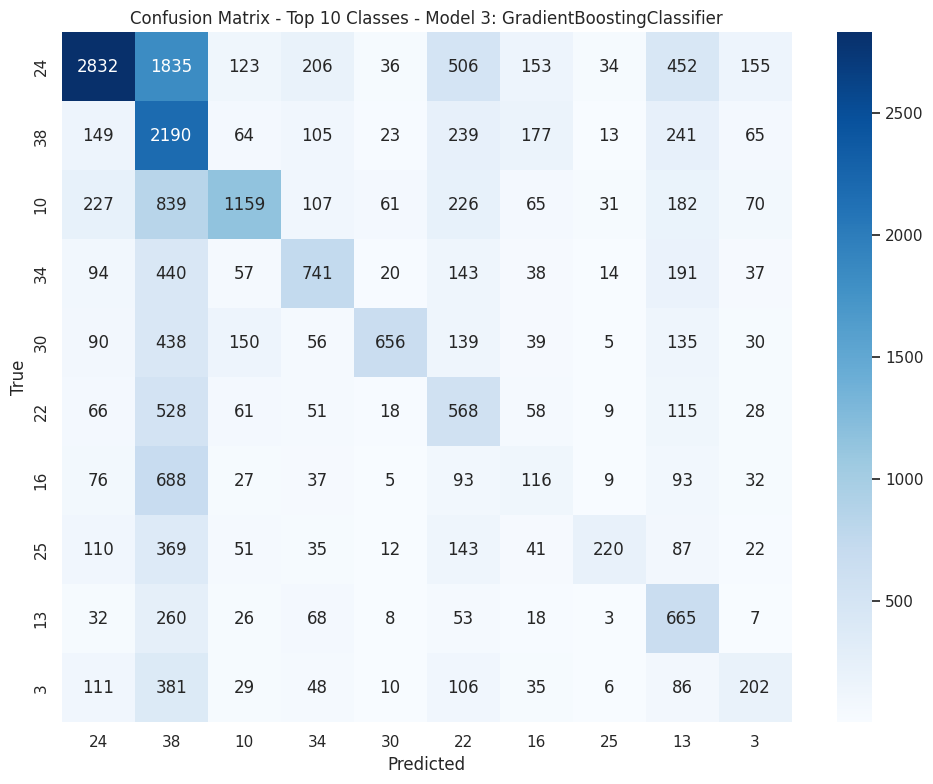

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from collections import Counter

# Get the most frequent N labels
N = 10
label_counts = Counter(y_test)
top_labels = [label for label, _ in label_counts.most_common(N)]

# Filter predictions to only those top classes
mask = np.isin(y_test, top_labels)
y_test_filtered = np.array(y_test)[mask]
y_pred_filtered = np.array(y_test_pred)[mask]

# Compute filtered confusion matrix
cm = confusion_matrix(y_test_filtered, y_pred_filtered, labels=top_labels)

# Plot filtered confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=top_labels, yticklabels=top_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix - Top {N} Classes - Model {i+1}: {type(model).__name__}")
plt.tight_layout()
plt.show()
